In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

In [3]:
ur_files = ddf.read_csv('EnvironmentSuicide/Environment_Suicide_2018.csv', dtype = {'fips': str})
climate_2018 = ur_files.compute()
climate_2018 = climate_2018.loc[:, ~climate_2018.columns.str.contains('^Unnamed')]
climate_2018.head()

,fips,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality,SuicideDeathRate
0,01001,75.264706,65.815746,9.427348,4.089503,0.194157,0.104972,0.546961,0.005525,0.0,0.157459,72.550842,65.507210,9.5,0.0,3,5.099510
1,01003,12.427907,68.342598,NaN,5.258610,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,7.2,0.0,4,11.466733
2,01005,94.311111,66.977961,9.317631,3.163085,0.139532,0.121212,0.413223,0.005510,0.0,0.220386,73.359889,66.823672,9.0,0.0,6,10.193062
3,01007,162.637500,64.006027,8.989589,3.444932,0.187534,0.120548,0.400000,0.008219,0.0,0.131507,72.778657,63.527227,9.4,1.0,2,4.521543
4,01009,243.931250,60.468767,NaN,4.017260,0.175918,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,9.4,1.0,2,3.943577


In [4]:
climate_2018 = climate_2018[['fips', 'elevation', 'mean_temp', 'visibility', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail', 'thunder', 'Relative_Humidity', 'Heat_Index', 'PM2.5', 'Ozone', 'rurality','SuicideDeathRate']]

In [5]:
climate_2018 = climate_2018.dropna()

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [7]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = climate_2018.iloc[:, 1:-1].values
y = climate_2018.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.22138728, 0.05809501, 0.06777843, 0.07091762, 0.03990843,
       0.04229607, 0.06465795, 0.05627568, 0.00176902, 0.04600231,
       0.09431105, 0.07381107, 0.10105567, 0.02266973, 0.03906467])

In [10]:
len(rf.feature_importances_)

15

In [11]:
columns = climate_2018.columns

In [12]:
columns = columns[1:-1]
columns = columns.tolist()
columns

['elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'Relative_Humidity',
 'Heat_Index',
 'PM2.5',
 'Ozone',
 'rurality']

In [13]:
len(columns)

15

Text(0.5, 0, 'Random Forest Feature Importance')

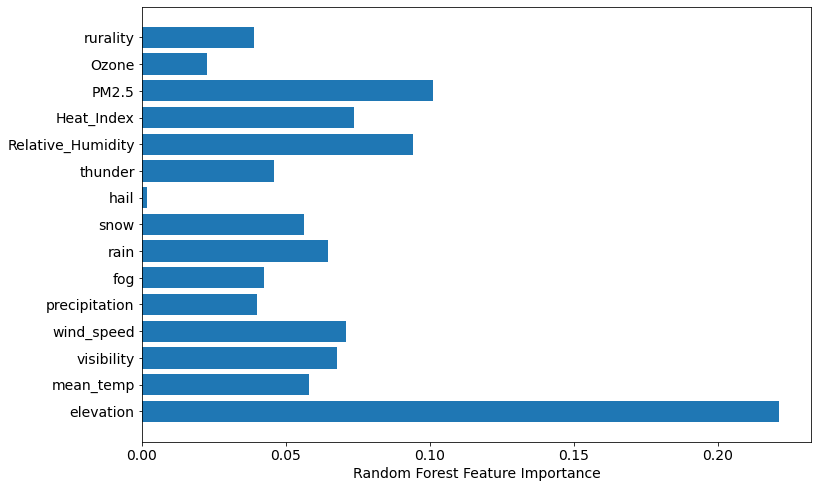

In [14]:
plt.barh(columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [15]:
sorted_idx = rf.feature_importances_.argsort()

In [16]:
sorted_idx

array([ 8, 13, 14,  4,  5,  9,  7,  1,  6,  2,  3, 11, 10, 12,  0])

In [17]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

In [18]:
rf.feature_importances_[sorted_idx]

array([0.00176902, 0.02266973, 0.03906467, 0.03990843, 0.04229607,
       0.04600231, 0.05627568, 0.05809501, 0.06465795, 0.06777843,
       0.07091762, 0.07381107, 0.09431105, 0.10105567, 0.22138728])

Text(0.5, 0, 'Random Forest Feature Importance')

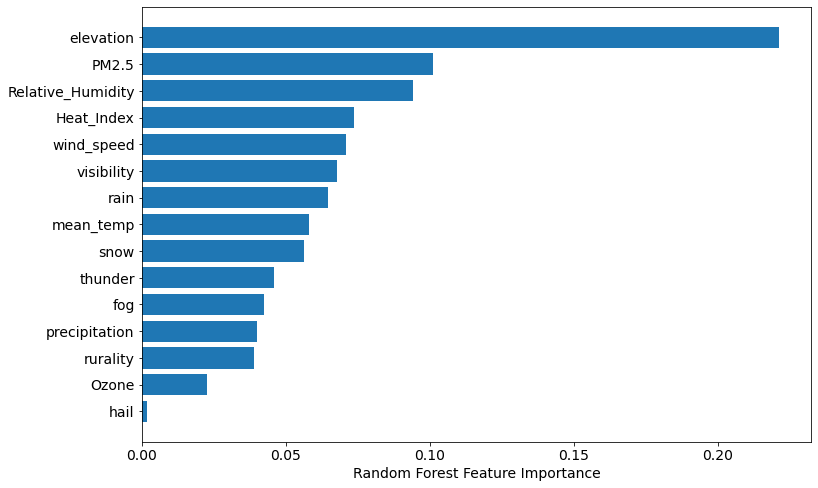

In [19]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

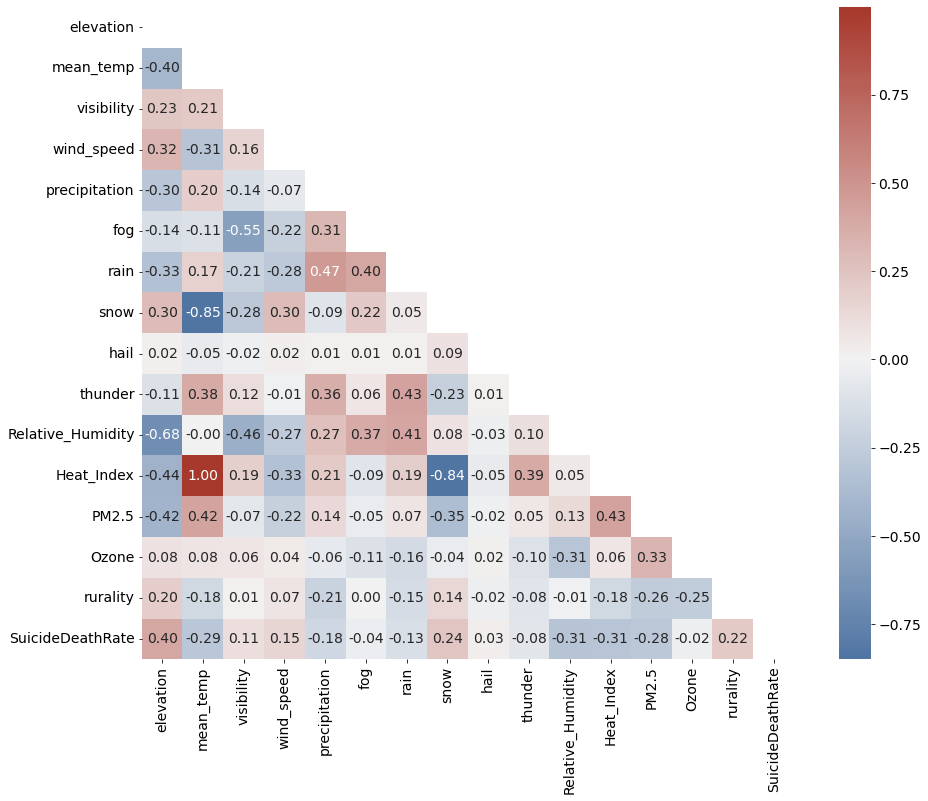

In [21]:
correlation_matrix(climate_2018)

## Find the economic feature importances

In [22]:
ur_files = ddf.read_csv('SocialEconomicSuicide/Social_Economic_Suicide_2018.csv', dtype = {'fips': str, 'per_capita_income': float})
social_2018 = ur_files.compute()
social_2018 = social_2018.loc[:, ~social_2018.columns.str.contains('^Unnamed')]
social_2018.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,30061,23744.0,0.169757,0.113593,0.293249,0.036492,0.253785,0.031195,0.003200,0.280218,0.008909,0.180480,0.085015,0.636168,0.018523,0.244681,"Mineral County, MT",9.906814
1,30069,32565.0,0.083532,0.011834,0.240741,0.005348,0.152672,0.016043,0.000000,0.194444,0.024570,0.199074,0.018519,0.587384,0.000000,0.430233,"Petroleum County, MT",13.113771
2,30077,25060.0,0.127172,0.114378,0.125810,0.031826,0.254481,0.036013,0.003755,0.194578,0.027816,0.146772,0.102900,0.496553,0.235388,0.168008,"Powell County, MT",11.198818
3,30089,23822.0,0.194971,0.111755,0.134527,0.026247,0.327786,0.011508,0.002511,0.288603,0.026843,0.179412,0.097908,0.556381,0.020571,0.175629,"Sanders County, MT",9.956192
4,30109,23137.0,0.158033,0.126394,0.117493,0.030181,0.131535,0.006036,0.008446,0.209362,0.048571,0.285957,0.048511,0.534532,0.022128,0.125000,"Wibaux County, MT",12.241232


In [23]:
social_2018['SuicideDeathRate'].isna().sum()

153

In [24]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
social_2018 = social_2018.dropna(how = 'any')

In [25]:
social_2018.shape

(3065, 18)

In [26]:
X = social_2018.iloc[:, 1:-2].values
y = social_2018.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [28]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.06298851, 0.05911679, 0.07808532, 0.06517227, 0.05050642,
       0.05783129, 0.06689835, 0.04678624, 0.08642061, 0.07180974,
       0.08040171, 0.0860471 , 0.05074047, 0.05242759, 0.08476759])

In [29]:
len(rf.feature_importances_)

15

In [30]:
columns = social_2018.columns
columns = columns[1:-2]
columns = columns.tolist()
columns

['per_capita_income',
 'percent_below_poverty',
 'percent_no_highschool_diploma',
 'percent_mobile_homes',
 'percent_no_vehicle',
 'percent_unemployed_CDC',
 'percent_overcrowding',
 'percent_multi_unit_housing',
 'percent_age_65_and_older',
 'percent_limited_english_abilities',
 'percent_age_17_and_younger',
 'percent_minorities',
 'percent_disabled',
 'percent_institutionalized_in_group_quarters',
 'percent_single_parent_households_CDC']

In [31]:
social_2018.shape

(3065, 18)

In [32]:
climate_2018.shape

(2747, 17)

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

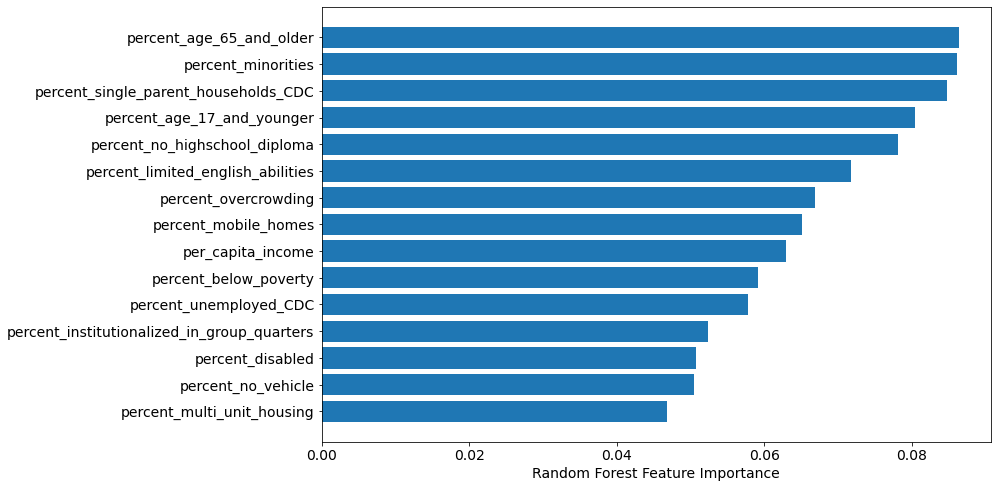

In [35]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

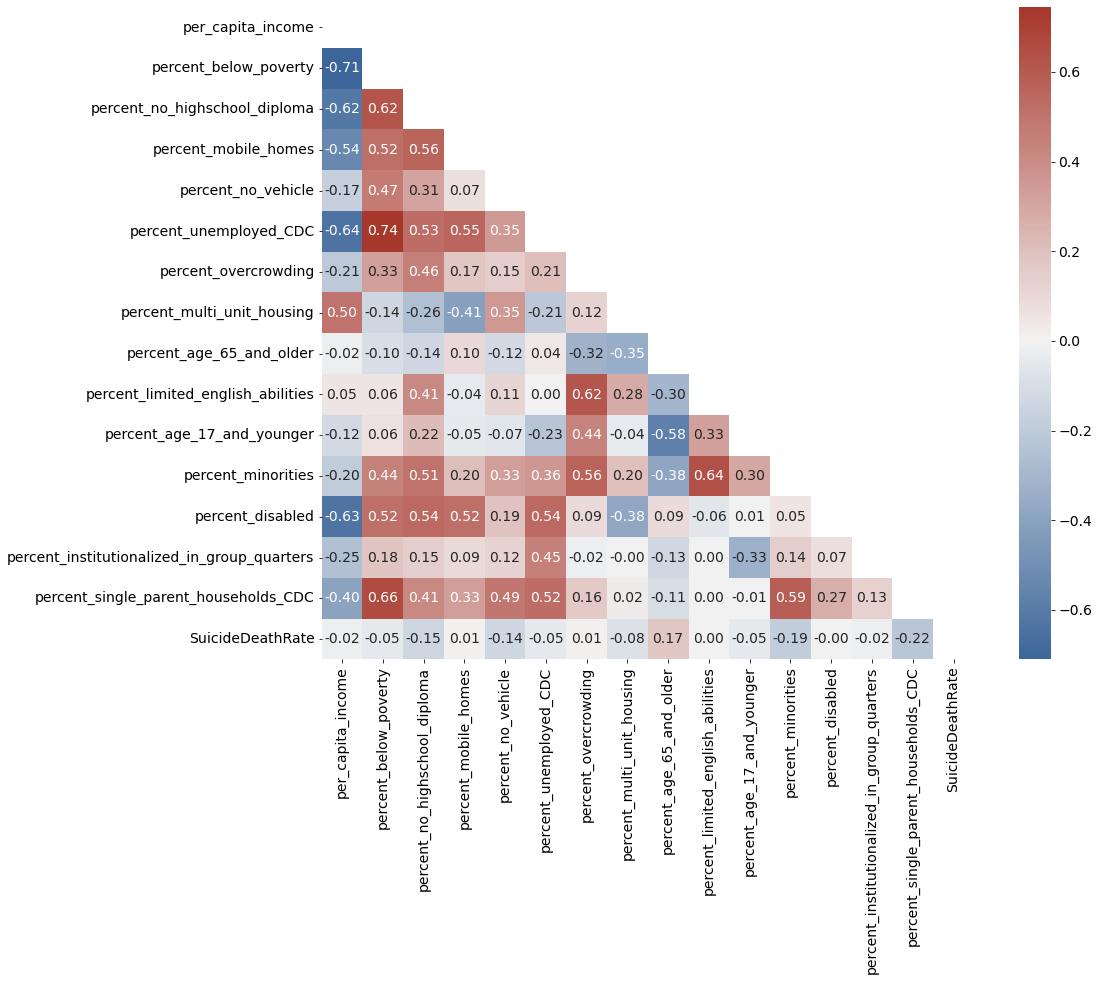

In [36]:
correlation_matrix(social_2018)

## find the rank of importances of all factors

In [37]:
df_total = social_2018.merge(climate_2018, on = ['fips', 'SuicideDeathRate'], how = 'left')
df_total = df_total.dropna(how = 'any')
df_total.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality
0,30061,23744.0,0.169757,0.113593,0.293249,0.036492,0.253785,0.031195,0.003200,0.280218,...,0.439227,0.234807,0.433702,0.0,0.022099,63.801846,35.192416,9.1,0.0,6.0
2,30077,25060.0,0.127172,0.114378,0.125810,0.031826,0.254481,0.036013,0.003755,0.194578,...,0.060274,0.191781,0.172603,0.0,0.046575,54.963256,41.516259,6.3,0.0,6.0
3,30089,23822.0,0.194971,0.111755,0.134527,0.026247,0.327786,0.011508,0.002511,0.288603,...,0.439227,0.234807,0.433702,0.0,0.022099,63.801846,35.192416,11.0,0.0,6.0
4,30109,23137.0,0.158033,0.126394,0.117493,0.030181,0.131535,0.006036,0.008446,0.209362,...,0.054755,0.331412,0.207493,0.0,0.048991,66.952032,38.364238,5.3,0.0,6.0
5,30031,34331.0,0.118921,0.033885,0.076931,0.033560,0.162148,0.015601,0.070098,0.117589,...,0.082192,0.252055,0.189041,0.0,0.057534,60.680593,39.553933,3.5,0.0,5.0


In [38]:
col = df_total.columns.values

In [39]:
col

array(['fips', 'per_capita_income', 'percent_below_poverty',
       'percent_no_highschool_diploma', 'percent_mobile_homes',
       'percent_no_vehicle', 'percent_unemployed_CDC',
       'percent_overcrowding', 'percent_multi_unit_housing',
       'percent_age_65_and_older', 'percent_limited_english_abilities',
       'percent_age_17_and_younger', 'percent_minorities',
       'percent_disabled', 'percent_institutionalized_in_group_quarters',
       'percent_single_parent_households_CDC', 'county',
       'SuicideDeathRate', 'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'Relative_Humidity', 'Heat_Index', 'PM2.5', 'Ozone',
       'rurality'], dtype=object)

In [40]:
new_col = ['fips', 'county', 'percent_below_poverty',
       'per_capita_income', 'percent_unemployed_CDC',
       'percent_no_highschool_diploma', 'percent_age_65_and_older',
       'percent_age_17_and_younger', 'percent_disabled',
       'percent_single_parent_households_CDC', 'percent_minorities',
       'percent_limited_english_abilities', 'percent_multi_unit_housing',
       'percent_mobile_homes', 'percent_overcrowding',
       'percent_no_vehicle',
       'percent_institutionalized_in_group_quarters', 
       'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'Relative_Humidity', 'Heat_Index',
       'fog', 'rain', 'snow', 'hail', 'thunder', 'PM2.5',
       'Ozone', 'rurality','SuicideDeathRate']

In [41]:
df_total = df_total[new_col]

In [42]:
df_total.shape

(2747, 33)

In [43]:
df_total.head()

,fips,county,percent_below_poverty,per_capita_income,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,...,Heat_Index,fog,rain,snow,hail,thunder,PM2.5,Ozone,rurality,SuicideDeathRate
0,30061,"Mineral County, MT",0.169757,23744.0,0.253785,0.113593,0.280218,0.180480,0.636168,0.244681,...,35.192416,0.439227,0.234807,0.433702,0.0,0.022099,9.1,0.0,6.0,9.906814
2,30077,"Powell County, MT",0.127172,25060.0,0.254481,0.114378,0.194578,0.146772,0.496553,0.168008,...,41.516259,0.060274,0.191781,0.172603,0.0,0.046575,6.3,0.0,6.0,11.198818
3,30089,"Sanders County, MT",0.194971,23822.0,0.327786,0.111755,0.288603,0.179412,0.556381,0.175629,...,35.192416,0.439227,0.234807,0.433702,0.0,0.022099,11.0,0.0,6.0,9.956192
4,30109,"Wibaux County, MT",0.158033,23137.0,0.131535,0.126394,0.209362,0.285957,0.534532,0.125000,...,38.364238,0.054755,0.331412,0.207493,0.0,0.048991,5.3,0.0,6.0,12.241232
5,30031,"Gallatin County, MT",0.118921,34331.0,0.162148,0.033885,0.117589,0.202618,0.334663,0.130443,...,39.553933,0.082192,0.252055,0.189041,0.0,0.057534,3.5,0.0,5.0,13.692300


In [44]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
X = df_total.iloc[:, 2:-1].values
y = df_total.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.0252744 , 0.02415845, 0.02224158, 0.02370081, 0.02990715,
       0.02892448, 0.02301409, 0.02044956, 0.03912058, 0.02814906,
       0.02120938, 0.02639776, 0.01849178, 0.02016986, 0.02718767,
       0.15690104, 0.03382344, 0.03756211, 0.03767304, 0.0212025 ,
       0.06652202, 0.05145238, 0.02438834, 0.03103359, 0.0458621 ,
       0.00091701, 0.02173766, 0.05813538, 0.01847633, 0.01591643])

In [47]:
len(rf.feature_importances_)

30

In [48]:
columns = df_total.columns
columns = columns[2:-1]
columns = columns.tolist()
columns

['percent_below_poverty',
 'per_capita_income',
 'percent_unemployed_CDC',
 'percent_no_highschool_diploma',
 'percent_age_65_and_older',
 'percent_age_17_and_younger',
 'percent_disabled',
 'percent_single_parent_households_CDC',
 'percent_minorities',
 'percent_limited_english_abilities',
 'percent_multi_unit_housing',
 'percent_mobile_homes',
 'percent_overcrowding',
 'percent_no_vehicle',
 'percent_institutionalized_in_group_quarters',
 'elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'Relative_Humidity',
 'Heat_Index',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'PM2.5',
 'Ozone',
 'rurality']

In [49]:
sorted_idx = rf.feature_importances_.argsort()

In [50]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

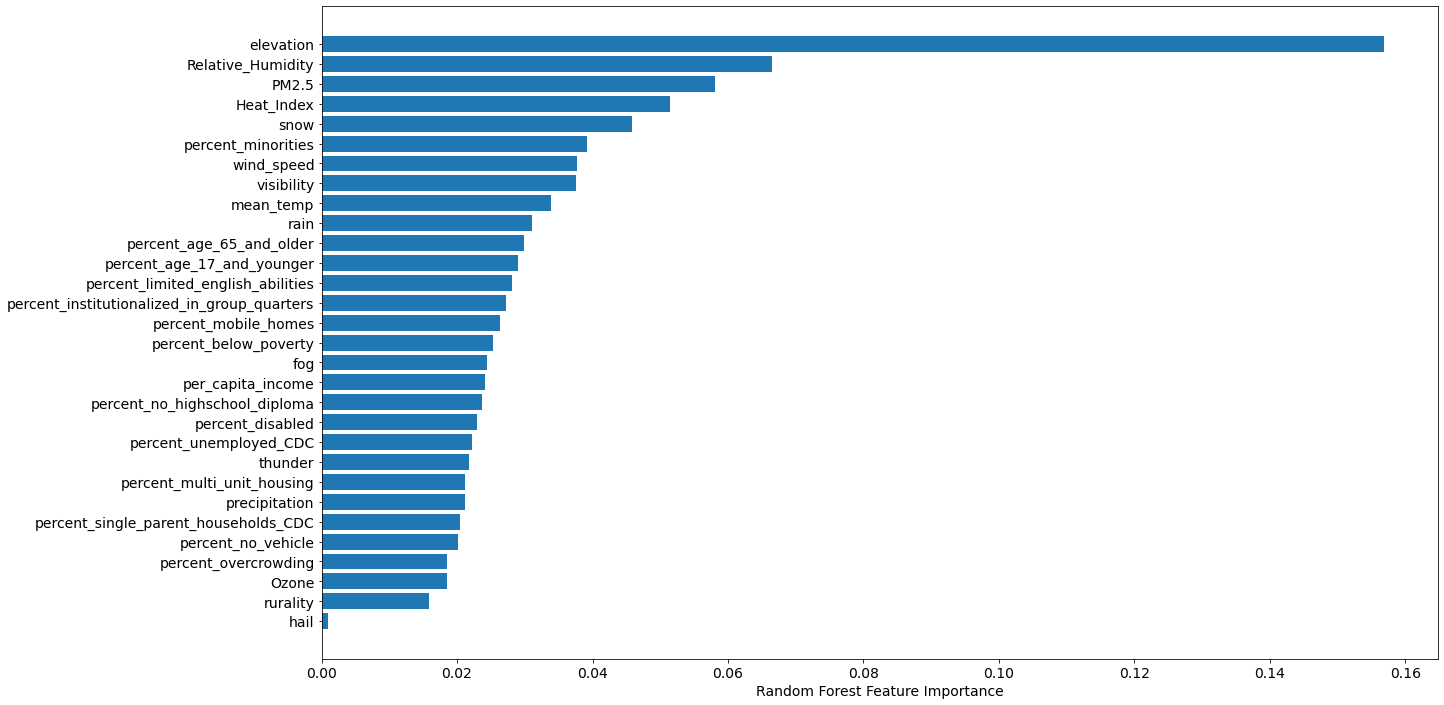

In [51]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## SHAP

In [52]:
import xgboost
import shap

In [53]:
X = climate_2018.iloc[:, 1:-1]
y = climate_2018.iloc[:, -1].array

In [54]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


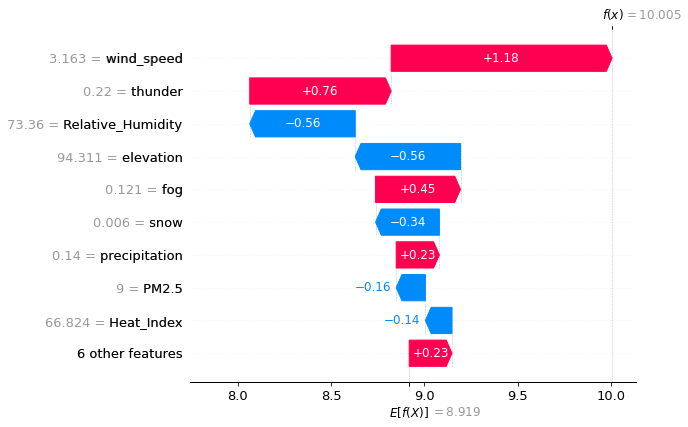

In [55]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

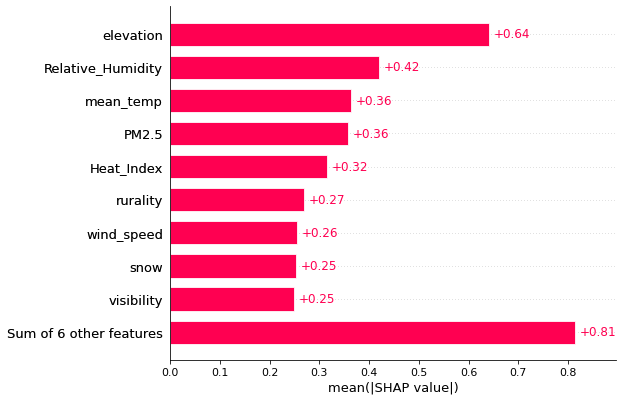

In [56]:
shap.plots.bar(shap_values)

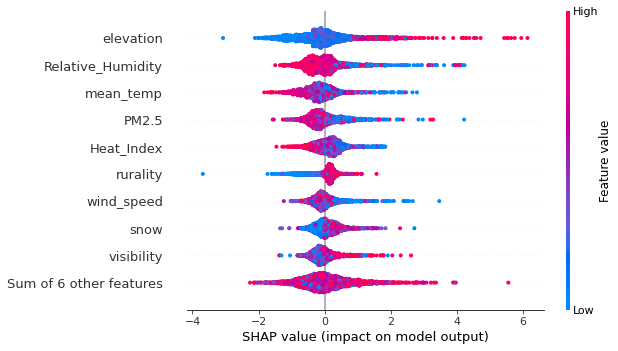

In [57]:
shap.plots.beeswarm(shap_values)

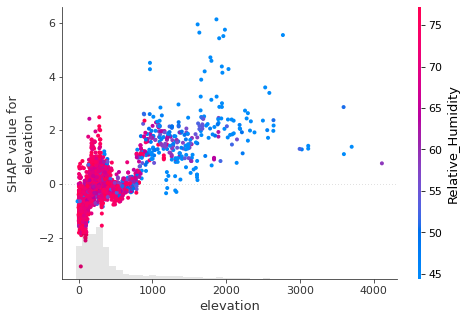

In [58]:
shap.plots.scatter(shap_values[:,"elevation"], color=shap_values)

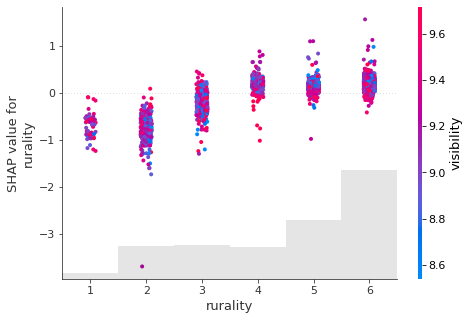

In [59]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values)

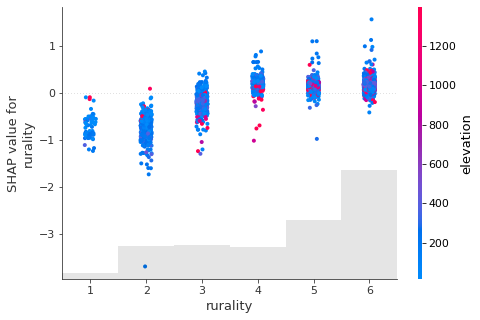

In [60]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"elevation"])

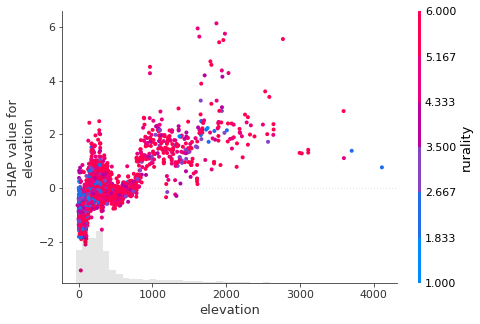

In [61]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

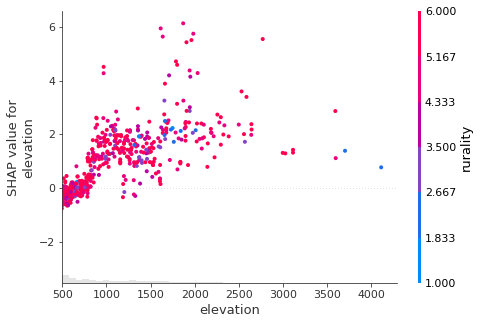

In [67]:
shap.plots.scatter(shap_values[:,"elevation"],shap_values[:,"rurality"], xmin=500)

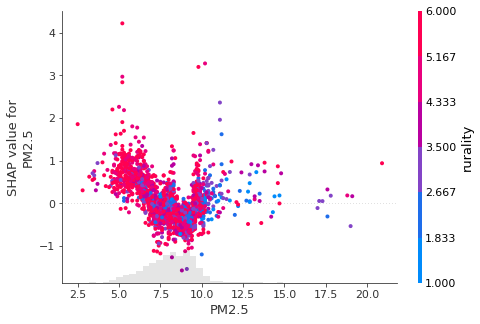

In [68]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"rurality"])

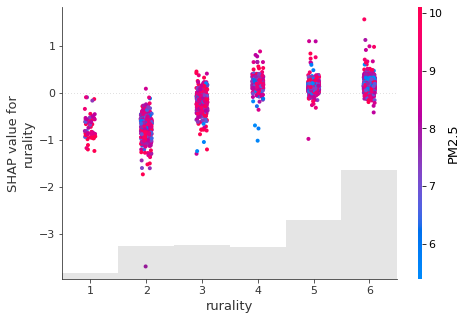

In [69]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"PM2.5"])

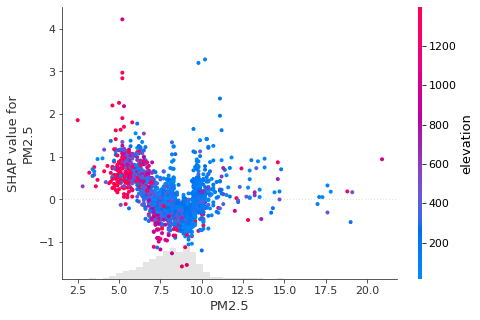

In [70]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"elevation"])

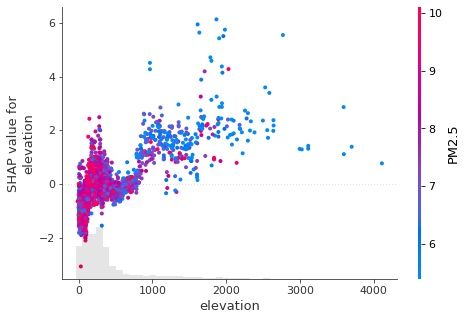

In [71]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"PM2.5"])

### social economic factors

In [72]:
social_2018.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,30061,23744.0,0.169757,0.113593,0.293249,0.036492,0.253785,0.031195,0.003200,0.280218,0.008909,0.180480,0.085015,0.636168,0.018523,0.244681,"Mineral County, MT",9.906814
1,30069,32565.0,0.083532,0.011834,0.240741,0.005348,0.152672,0.016043,0.000000,0.194444,0.024570,0.199074,0.018519,0.587384,0.000000,0.430233,"Petroleum County, MT",13.113771
2,30077,25060.0,0.127172,0.114378,0.125810,0.031826,0.254481,0.036013,0.003755,0.194578,0.027816,0.146772,0.102900,0.496553,0.235388,0.168008,"Powell County, MT",11.198818
3,30089,23822.0,0.194971,0.111755,0.134527,0.026247,0.327786,0.011508,0.002511,0.288603,0.026843,0.179412,0.097908,0.556381,0.020571,0.175629,"Sanders County, MT",9.956192
4,30109,23137.0,0.158033,0.126394,0.117493,0.030181,0.131535,0.006036,0.008446,0.209362,0.048571,0.285957,0.048511,0.534532,0.022128,0.125000,"Wibaux County, MT",12.241232


In [73]:
X = social_2018.iloc[:, 1:-2]
y = social_2018.iloc[:, -1].array

In [74]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


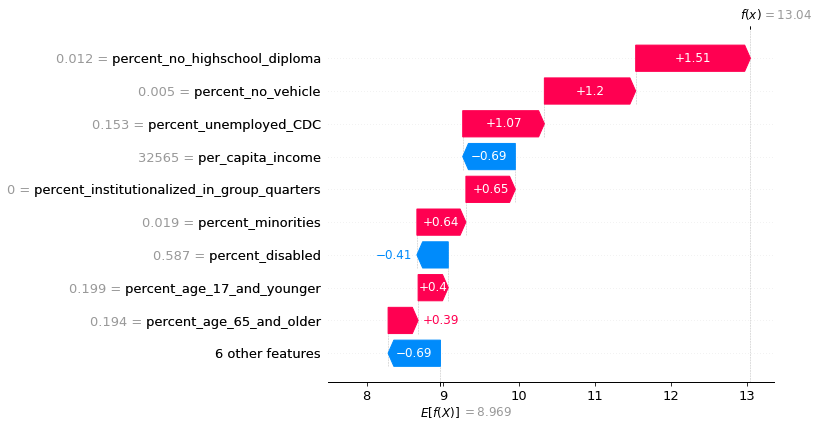

In [75]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

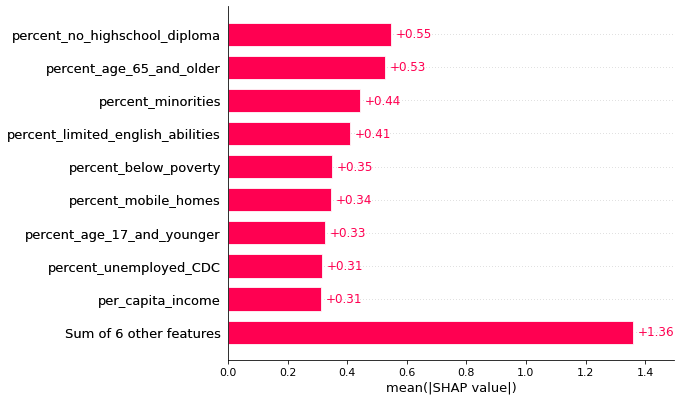

In [76]:
shap.plots.bar(shap_values)

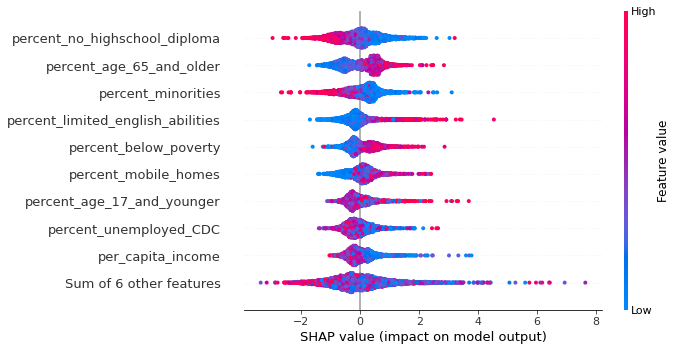

In [77]:
shap.plots.beeswarm(shap_values)

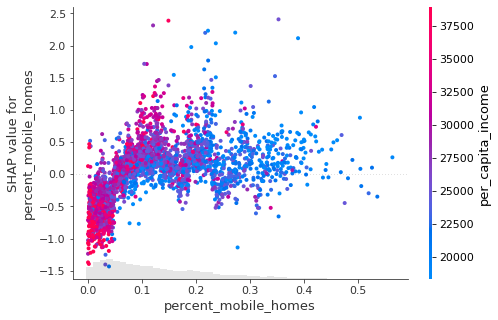

In [78]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)